# DS 3000 HW 6

Due: Mon Mar 29 @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file to gradescope.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run "Kernel > Restart & Run All" just before uploading the `ipynb` file to gradescope.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or post a piazza note if you have a specific question about your work you'd like another pair of eyes to talk through.  (Remember, mark your piazza note private if it contains anything which may be considered a solution to the exercise).

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment.  For example, a python trick I find particularly clever (and useful, sometimes):

```python
from collections import defaultdict

def tree(): 
    # https://gist.github.com/hrldcpr/2012250
    return defaultdict(tree)
```

You need not cite the official python documentation or the documentation of any python library which is imported in the template (e.g. matplotlib, numpy, scipy).

**Documentation / style counts for credit**  Please see our course's python style guide, available on canvas, for further information.


## Part 1 (22 points)

Match each of the covariance matrices to the dataset which is most consistent.  Note that all scatterplots below have equal scales in the x and y axes (moving an inch to the right increases x as much as moving an inch up increases y).  

Please express your response as list, ordered alphabetically by dataset.  For example, you might respond with:

- Data Set A = $\Sigma_0$
- Data Set B = $\Sigma_1$
- Data Set C = $\Sigma_2$
- Data Set D = ...

(If you'r eunsure how to format a "Sigma" in Latex, double click this markdown cell and examine the source which generated the list above)

<img src="https://i.ibb.co/K7DY3mx/cov3by3.png" alt="Drawing" style="width: 600px;"/>


$$\Sigma_0 =\begin{bmatrix} 
5 & 1\\ 
1 & 2
\end{bmatrix}, 
\Sigma_1 =\begin{bmatrix} 
4 & 0\\ 
0 & 0
\end{bmatrix}, 
\Sigma_2 =\begin{bmatrix} 
1 & -1\\ 
-1 & 7
\end{bmatrix}, 
\Sigma_3 =\begin{bmatrix} 
7 & 4\\ 
4 & 5
\end{bmatrix}, 
\Sigma_4 =\begin{bmatrix} 
5 & 3\\ 
3 & 2
\end{bmatrix}$$

$$\Sigma_5 =\begin{bmatrix} 
6 & 2\\ 
2 & 6
\end{bmatrix}, 
\Sigma_6 =\begin{bmatrix} 
4 & -2\\ 
-2 & 5
\end{bmatrix}, 
\Sigma_7 =\begin{bmatrix} 
1 & -2\\ 
-2 & 5
\end{bmatrix}, 
\Sigma_8 =\begin{bmatrix} 
2 & 0\\ 
0 & 2
\end{bmatrix}$$



- Data Set A = $\Sigma_5$
- Data Set B = $\Sigma_2$
- Data Set C = $\Sigma_3$
- Data Set D = $\Sigma_8$
- Data Set E = $\Sigma_3$
- Data Set F = $\Sigma_6$
- Data Set G = $\Sigma_1$
- Data Set H = $\Sigma_0$
- Data Set I = $\Sigma_7$

# Part 2: New COVID-19 cases, Scale in Covariance Matrices (12+1 points)

This problem uses `covid_data.csv` which measures the total new daily COVID cases each day in Massachusetts, California and NEU.  So if `MA` is 1 on 3/16/2021, then we know that there 1 reported COVID case on 3/16/2021.

In [1]:
import pandas as pd

df_covid = pd.read_csv('covid_data.csv', index_col='date')

In [2]:
df_covid.cov()

,MA,CA,NEU
MA,4.217750e+06,2.351385e+07,6864.562272
CA,2.351385e+07,1.980773e+08,40762.364969
NEU,6.864562e+03,4.076236e+04,30.653335


In [3]:
df_covid.head()

,MA,CA,NEU
date,,,
2021-03-03,1899,3352,11
2021-03-02,301,2533,10
2021-03-01,1395,3516,11
2021-02-28,1468,4685,7
2021-02-27,1700,5151,4


A younger version of yourself, before having mastered Correlation and Covariance as you now have, may have had the following reasoning:

    "The covariance between MA and CA is about 23 million, which is much larger than the covariance between CA and NEU (about 4 thousand).  Therefore, I conclude that infections in MA and CA must change more consistently together than CA and NEU."

Identify and correct your past self's interpretation mistake by offering a more principled analysis of what relationships do and don't exist in the data.

To receive full credit on this question, be sure to:
- correctly identify the thinking error:
    - why is cov(MA, CA) > cov(CA, NEU)? 
        - (use might use your `.head()` to do some thinking!)
    - what should we use to measure the consistency with which values change?
- clearly explain / teach the difference so that a non-technical audience may understand
- utilize whatever features of the python libraries we've studied you see fit to explain yourself

Be clear.  Be brief.

Bonus (+1 point): Hypothesize why NU's relationship to the other states is different than between MA and CA.

In [4]:
df_covid.head()

,MA,CA,NEU
date,,,
2021-03-03,1899,3352,11
2021-03-02,301,2533,10
2021-03-01,1395,3516,11
2021-02-28,1468,4685,7
2021-02-27,1700,5151,4


In [5]:
# the correlation of the table df coivd data
correlation = df_covid.corr()

In [6]:
correlation

,MA,CA,NEU
MA,1.000000,0.813516,0.603717
CA,0.813516,1.000000,0.523122
NEU,0.603717,0.523122,1.000000


## Answer:
1. why is cov(ma, ca) > cov(ca, neu)

The reason that the cov(ma, ca) is way bigger that cov(ca, neu) is that we can see from the dd_covid table that the total cases in NEU is comparatively super small; due to the formula that $cov_{x,y}=\frac{\sum(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$, we can easily see that cov(ma,ca) > cov(ca, neu)


2. what should we use to measure the consistency with which values change?

we shoud use the correlation to measure.

# Part 3: New COVID-19 cases, Demonstrating a changing rate (30 points: 6 pts per subpart)

We seek to understand if the number of new cases changed when thanksgiving occured.  Namely, we test the following hypothesis for each location:

    H_1: The average number of new COVID cases per day is different between the 3 weeks before (11/5 - 11/25 inclusive) and the 3 weeks after (11/27 - 12/16 inclusive)  Thanksgiving
    
Suggestions for dealing with ranges of dates:
- use the fact that the data is reverse chronologically sorted
    - newer entries at the top of the dataframe, older dates towards the bottom
- dates must be in `datetime` for nice axis formatting (part 3.1)
    - use `pd.to_datetime()` to cast a column to datetime
        - doesn't work on an index though ... how do we `reset_index()` back to a column again?
- you may find it easier to use the dates as strings so you can reference a row as without dealing with `datetime`:
```python
df_covid.loc['2020-11-25', :]
```
    - feel free to reload the data for part 3.2 after you've completed the plotting of part 3.1 so you'll have the dates as a string index, rather than a datetime column
   

## Part 3.1
Before starting the analysis make some 'sanity-check' plots to see what the data looks like.  Plot the new cases from 11/5 to 12/16 (inclusive) in any way you see fit.

- Because the scale of each location may vary, its easier to make a seperate plot per location.  Please do.
- these graphs don't need to look great, they're just for you to find any anomolies before you send the data into the analysis

In [7]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# newer entries at the top of the dataframe, older dates towards the bottom
# dates must be in `datetime` for nice axis formatting 
#use `pd.to_datetime()` to cast a column to datetime

# copy a new dataframe

newdf_covid = df_covid.reset_index()

newdf_covid["date"] = pd.to_datetime(newdf_covid['date'])

In [9]:
newdf_covid.head(10)

,date,MA,CA,NEU
0,2021-03-03,1899,3352,11
1,2021-03-02,301,2533,10
2,2021-03-01,1395,3516,11
3,2021-02-28,1468,4685,7
4,2021-02-27,1700,5151,4
5,2021-02-26,1987,5400,12
6,2021-02-25,2108,4965,10
7,2021-02-24,2102,5303,21
8,2021-02-23,1237,3447,18
9,2021-02-22,1262,4665,10


In [10]:
# part 3.1
#new cases from 11/5 to 12/16 (inclusive) in any way you see fit.
x_data = newdf_covid['date'].loc[77 : 118]
y_data = newdf_covid['MA'].loc[77 : 118]

In [11]:
x = df_covid.loc['2020-11-05' : '2020-12-16'].reset_index()["date"]

In [12]:
y = df_covid.loc['2020-11-05' : '2020-12-16'].reset_index()["MA"]

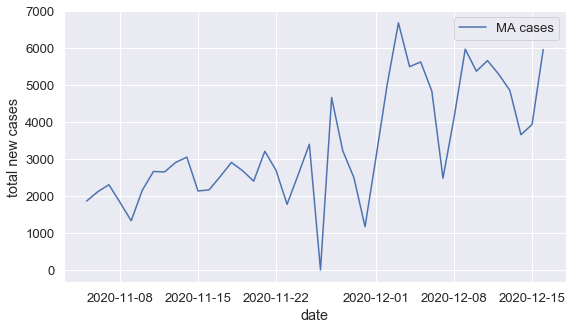

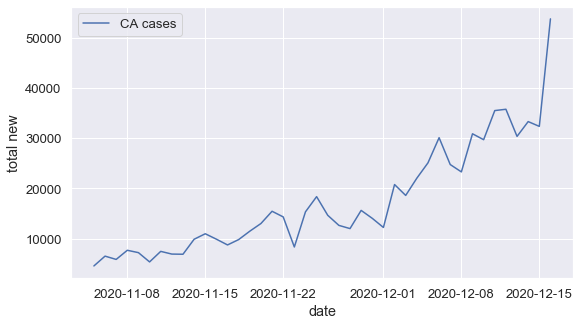

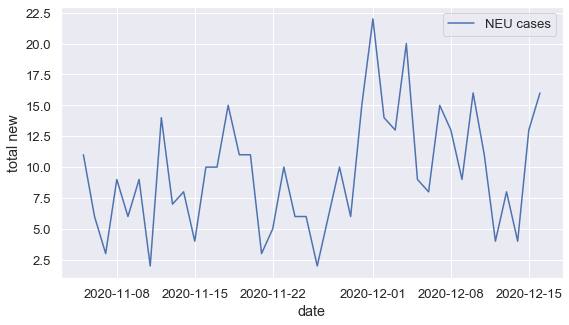

In [13]:
sns.set(font_scale=1.2)
plt.figure(figsize = (9,5))
plt.plot(x_data,y_data, label = "MA cases")
plt.ylabel("total new cases")
plt.xlabel("date")

plt.legend()

# here is the plot for doing the ca data
# plot for CA 

plt.figure(figsize = (9,5))
plt.plot(newdf_covid['date'].loc[77 : 118],newdf_covid['CA'].loc[77 : 118] , label = "CA cases")
plt.ylabel("total new")
plt.xlabel("date")
plt.legend()

# here is the plot for doing the ca data
# plot for NEU

plt.figure(figsize = (9,5))
plt.plot(newdf_covid['date'].loc[77 : 118],newdf_covid['NEU'].loc[77 : 118], label = "NEU cases")
plt.ylabel("total new")
plt.xlabel("date")

plt.legend()

## Part 3.2
Identify the appropriate test from the three we studied in class:
- Pearson's R
- T-Test (unpaired samples)
- T-Test (paired samples)
    

## Answer of 3.2:

-  We should use the T_test(unpaired samples, ), The unpaired  t-test is used to compare the mean of independent groups. in this analysis, we want to see if there is any real difference as well as the states cases are independent to each other; hence we need to use the t-test unpaired samples.

## Part 3.3
List and qualitatively evaluate all assumptions for your selected test (no need to call the functions shown in class to check assumptions).

## Answer of 3.3:
1. the first assumption is that the x data are normally distributed
2. is that the p value for the three test are going to be less than 0.05
3. 


In [14]:
from scipy.stats import norm
#mu, std = norm.fit(x_data)
#plt.hist(x_data, bins=30, label='ssss', density=True)

## Part 3.4
Produce a p-value for each location by
- collecting the appropriate data from `df_covid`
- feeding it into the appropriate function from `scipy.stats`
- printing a statement to the command line which lists the location (MA, CA or NU) as well as the pvalue

Be sure to use a loop rather than copy/pasting code to perform the task at every location:
```python
for location in df.columns:
    # compute that pvalue!
```

In [15]:
newdf_covid.head()

,date,MA,CA,NEU
0,2021-03-03,1899,3352,11
1,2021-03-02,301,2533,10
2,2021-03-01,1395,3516,11
3,2021-02-28,1468,4685,7
4,2021-02-27,1700,5151,4


In [16]:
df_covid.head()

,MA,CA,NEU
date,,,
2021-03-03,1899,3352,11
2021-03-02,301,2533,10
2021-03-01,1395,3516,11
2021-02-28,1468,4685,7
2021-02-27,1700,5151,4


In [17]:
from scipy.stats import ttest_ind


In [18]:
# use the for loop to do the test for each location, MA, CA, NEU
for location in df_covid.columns:
    # collect data in the given range
    before = df_covid.loc['2020-11-25':'2020-11-05', :][[location]]
    after = df_covid.loc['2020-12-16':'2020-11-27', :][[location]]
    
    # run t test and compute pvalue
    t, pval = ttest_ind(before, after)
    # print the result
    print(f'P value of {location} is {pval[0]}')

P value of MA is 3.3290768497066095e-07
P value of CA is 7.589809416090518e-08
P value of NEU is 0.009217838380816074


## Part 3.5
Summarize the meaning of these three p-values for a non-technical audience
- no need to discuss rejecting / not-rejecting the null hypothesis
- just tell us what the p-values are suggesting and how strongly they suggest it

### Answer of 3.5:
The p value is the evidence against a null hypothesis. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.

From the ttest that we demonstrate above, the pvalue of mA is 3.3E-07,which means that for the 3.3E-0.5% chance that the result is probability being random(happen by chance)
the p value of ca, is 7.5E-08, the p value of neu is 0.009; hence, we can easily get that NEU has the biggest p value that for 0.9% possibility that the result is happening by random. 

## Part 3.6 (+2 bonus)
If we're testing all 3 hypothesis (one per location) as the same time, is it [appropriate](https://xkcd.com/882/) to declare any of them significant because they're associated p-value is less than $\alpha=.05$?  Justify your thinking so a non-technical reader can understand.

### Answer of 3.6:

I suppose it is appropriate to declare any of them significant only based on the p-value is less than 0.05; as in the statistic, we know that when the p value is less than 0.05, it means the result is statistically significant. It indicates strong evidence against the null hypothesis.

# Part 4: Classifying Metal (36+3 points: 8, 20, 8, +3)

To the un-initiated ear all metal music might sound similar but there are a variety of genres, each with characteristic elements. In this exercise we will build a kNN classifier to distinguish between the three metal genres listed below.

**Content warning:** metal music is rather extreme and the lyrics can be explicit and troubling.  You needn't listen to the music below to complete and understand this DS exercise.   

* **metalcore** is characterised by yelling and screaming vocals and stop/start rythm guitar playing. It has influences of punk and hardcore. See ["When I Lost My Bet"](https://open.spotify.com/track/4QNrAao1rDm5XcThnAYEOj) by The Dillinger Escape Plan
* **death metal**: is characteristed by growling vocals and downtuned guitars played with a lot of palm muting. It developed from thrash metal. See ["Pull the Plug"](https://open.spotify.com/track/2l0h4aBFLp9HdoaNdCTlbW) by Death
* **heavy metal**: is an umbrella-genre, with metalcore and death metal being more specific subgenres. We'd expect that if something is tagged as heavy metal it might not have a better fitting label. See ["Paranoid"](https://open.spotify.com/track/1Y373MqadDRtclJNdnUXVc) by Black Sabbath

## Part 4.1
- load the `spotify_metal_genre_simple.csv` dataset
    - each row is its own song
- plot the pairwise feature scatter plots using `sns.pairplot`
- Using the pairplot above give one or two of the most distinguishing characteristics of each metal genre.  For example, you might say that:

        Death metal is typically newer & more danceable more danceable than the other genres

(Note: the statement immediately above is an example characterization which may or may not be accurate)

In [19]:
# load the data
df_metal = pd.read_csv('spotify_metal_genre_simple.csv')
df_metal

,loudness,instrumentalness,liveness,tempo,duration_ms,years,genre
0,-4.219,0.000028,0.3150,125.028,212013,2014,metalcore
1,-5.411,0.783000,0.1640,124.928,93733,2011,metalcore
2,-3.612,0.006100,0.0668,159.933,205267,2009,metalcore
3,-3.286,0.000002,0.7700,180.153,184640,2004,metalcore
4,-4.086,0.358000,0.3850,200.005,297427,2010,metalcore
...,...,...,...,...,...,...,...
295,-4.723,0.262000,0.3790,161.028,493427,2015,heavy-metal
296,-4.738,0.116000,0.0815,110.045,264253,2007,heavy-metal
297,-6.314,0.002410,0.2060,101.886,301053,1989,heavy-metal
298,-6.780,0.601000,0.0905,96.552,312707,1986,heavy-metal


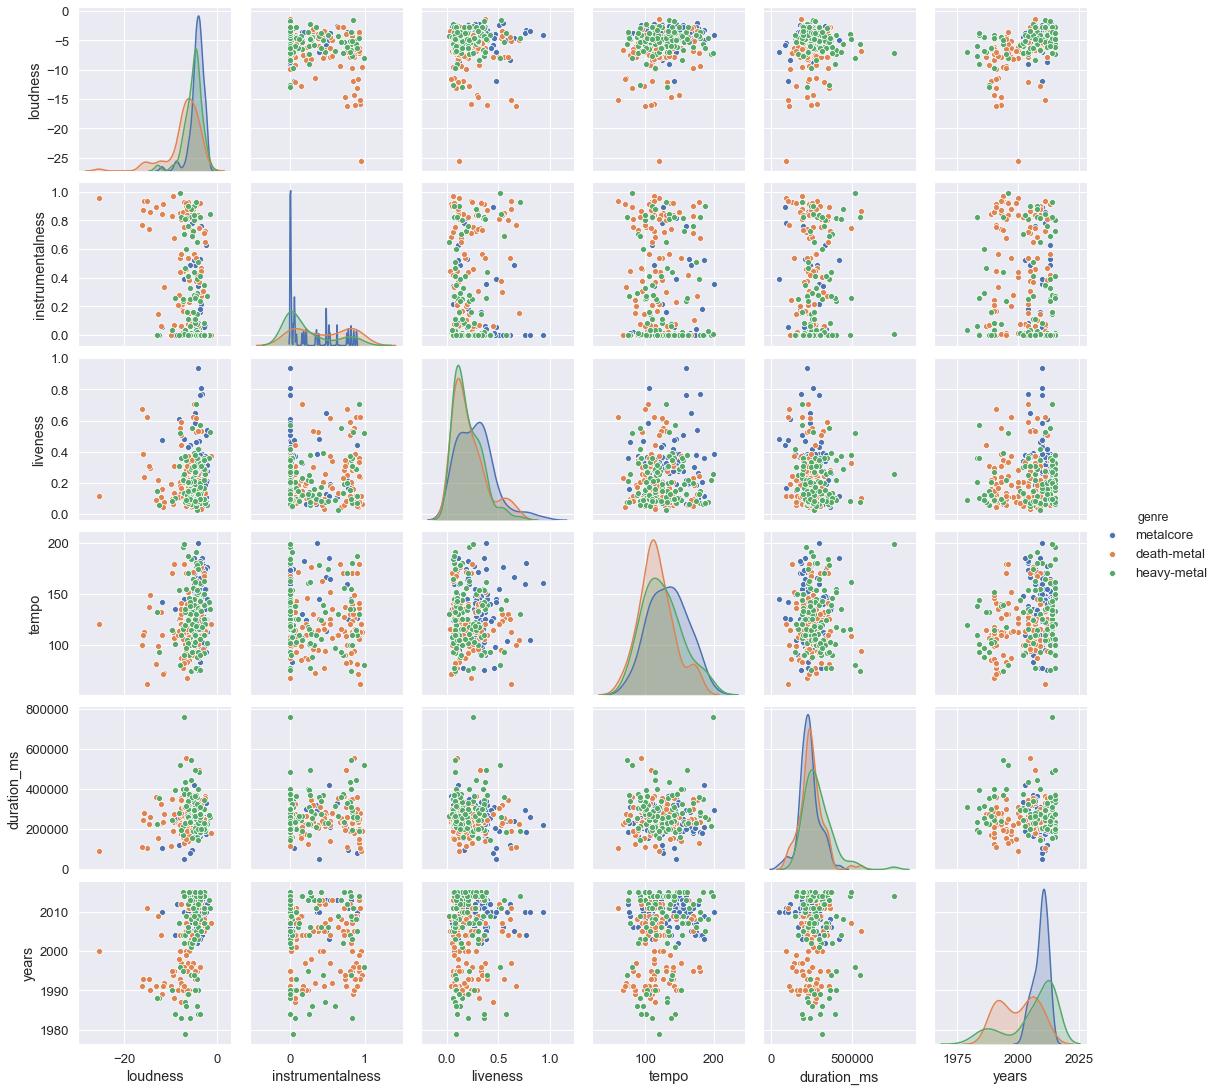

In [20]:
# plot features
sns.pairplot(df_metal, "genre")

## Part 4.2
* divide the data into the `X` (features) and `y` (labels) arrays 
* normalize the data (see scale normalization)
* using 10-fold cross validation, plot a confusion matrix for each metal subgenre classifier below:
    - 1-NN classifier
    - 5-NN classifier
    - 11-NN classifier
    - 15-NN classifier
    - 27-NN classifier
    - 71-NN classifier
    
(Be sure to use a loop to handle each of the distinct `k` above:)
```python
for k in (1, 5, 11, 15, 27, 71):
    # train / eval k-NN classifer
```
* For each classifier above, save the confusion matrix in dictionary so we can refer to them later.  To save the 1-NN classifier:
```python
conf_matrix_dict[1] = conf_matrix
```
    

In [21]:
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

In [22]:
x_feat_list = []

# for loop to get the target data from the headers except the year
for i in df_metal.columns[:-1]:
    x_feat_list.append(i)

In [23]:
x_feat_list

['loudness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'years']

In [24]:
y_feat = df_metal.columns[-1]

In [25]:
y_feat

'genre'

In [26]:
# loc to get all of the info data that needed for the ML

# get all of the columns as in the list. 
x = df_metal.loc[:, x_feat_list].values
y_true = df_metal.loc[:, y_feat].values
conf_matrix_dict = {}

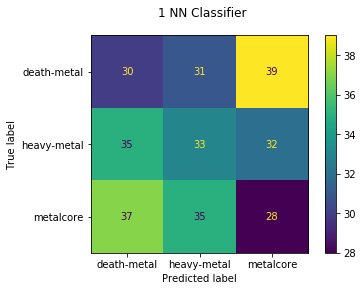

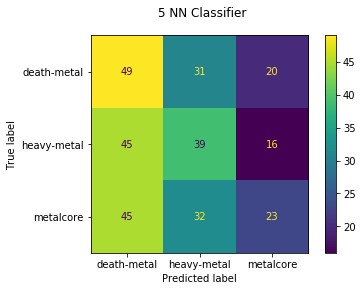

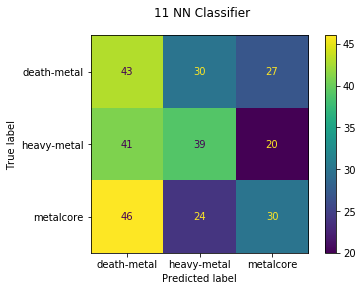

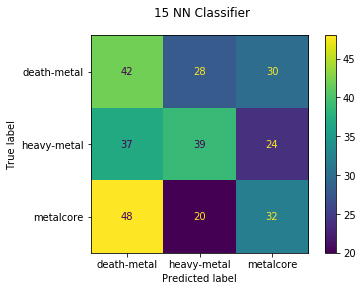

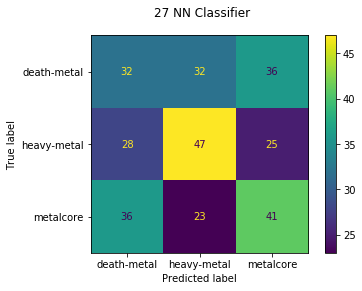

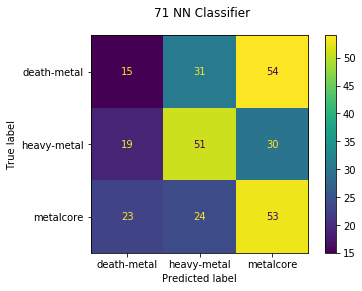

In [27]:
n_splits = 10
for k in (1, 5, 11, 15, 27, 71):
# initialize a knn_classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

# "Stratified" ensures (roughly) same number of species across folds
# otherwise we could get funny results with all `Adelie` penguins in one fold...
    kfold = StratifiedKFold(n_splits=n_splits)

# initialize an empty array same size as y_true
    y_pred = np.empty_like(y_true)

    for train_idx, test_idx in kfold.split(x, y_true):
    # get training data
        x_train = x[train_idx, :]
        y_true_train = y_true[train_idx]

    # get testing data
        x_test = x[test_idx, :]
        y_true_test = y_true[test_idx]

    # train on training data
        knn_classifier.fit(x_train, y_true_train)

    # estimate each penguin's species
        y_pred[test_idx] = knn_classifier.predict(x_test)
    # compute confusion matrix
    conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)

  
    # polot confusion matrix
    conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_true))

    sns.reset_orig()
    conf_mat_disp.plot()
    plt.suptitle(f'{k} NN Classifier')
    
    
    # storing each matrix in the dict
    conf_matrix_dict[k] = conf_mat
    


## Part 4.3
- Using the `conf_matrix_dict` above, compute the accuracy of each of the classifiers (proportion of all samples correctly predicted).  The accuracies will probably be slightly different, explain any major differences or state that all values of k tested produce equally accurate results.
    - `np.diag()` extracts the diagonal entries of a matrix
    - `x.sum()` adds all entries of matrix `x` together
- By observing the confusion matrices, which pair of the metal genres appears to be most distinct?  
- Which metal genre is most difficult to distinguish and why?
    - hint: read the descriptions of the metal genres
    
    

In [28]:
conf_matrix_dict

{1: array([[30, 31, 39],
        [35, 33, 32],
        [37, 35, 28]], dtype=int64),
 5: array([[49, 31, 20],
        [45, 39, 16],
        [45, 32, 23]], dtype=int64),
 11: array([[43, 30, 27],
        [41, 39, 20],
        [46, 24, 30]], dtype=int64),
 15: array([[42, 28, 30],
        [37, 39, 24],
        [48, 20, 32]], dtype=int64),
 27: array([[32, 32, 36],
        [28, 47, 25],
        [36, 23, 41]], dtype=int64),
 71: array([[15, 31, 54],
        [19, 51, 30],
        [23, 24, 53]], dtype=int64)}

## As we can see that all of the predicted on that is correct are on the diagonal ; hence we just us the the sum of the diagonal divided by the total sum to get the accuracy

In [29]:
# using the for loop to get the diag and the sum of each array in it. 
for i in conf_matrix_dict:
    total = conf_matrix_dict[i].sum()
    diag = np.diag(conf_matrix_dict[i])
    accu = diag.sum()/total
    print(f'the diagonal entries of {i} matrix is {diag}')
    print(f'the sum of {i} matrix is {total}')
    print(f'the sum of {i} matrix is {accu}')
    print('\n')

the diagonal entries of 1 matrix is [30 33 28]
the sum of 1 matrix is 300
the sum of 1 matrix is 0.30333333333333334


the diagonal entries of 5 matrix is [49 39 23]
the sum of 5 matrix is 300
the sum of 5 matrix is 0.37


the diagonal entries of 11 matrix is [43 39 30]
the sum of 11 matrix is 300
the sum of 11 matrix is 0.37333333333333335


the diagonal entries of 15 matrix is [42 39 32]
the sum of 15 matrix is 300
the sum of 15 matrix is 0.37666666666666665


the diagonal entries of 27 matrix is [32 47 41]
the sum of 27 matrix is 300
the sum of 27 matrix is 0.4


the diagonal entries of 71 matrix is [15 51 53]
the sum of 71 matrix is 300
the sum of 71 matrix is 0.39666666666666667




# Answers
### From the graph above, that we see we get the highest accuracy when we use the 27 nn classifier.

Since when the accuracy is getting higher; however, the death metal is getting lower, we conclude that the death metal is the most hard one ot distinguish

## Part 4.4 (bonus)
Scale normalization, as implemented in the class notes, violates the "seperation of training and testing data" which motivated Cross Validation.  Explain how you might resolve this issue in practice.  
- Feel free to use this data as an example
- There isn't any need to implement this improvement, Part 4.2 may make this "error" and receive full credit